# OCMP5048 Visual Analytics Week 1 lab Part 2

# Introduction to Python and Matplotlib

## Matplotlib

A good way to learn about a library package is to work through the tutorials on its website. 

“Matplotlib is a comprehensive library for creating static, animated, and interactive visualisations in Python.” - Matplotlib

Here are some useful links

Matplotlib Tutorials:

https://matplotlib.org/stable/tutorials/introductory/index.html

Matplotlib Users Guide:

https://matplotlib.org/stable/users/index.html

Matplotlib Cheatsheets:

https://matplotlib.org/cheatsheets/

## How to save the chart to a file?

Check this matplotlib function:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Dataset

In [2]:
#Load dataset

ori_data = pd.read_csv("world_population.csv")

In [3]:
#Inspect dataset

ori_data.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

## Practice

### 1) Temporal Analysis (simple line chart): How does the population of Australia change from 1970 - 2022? 
### Give your chart appropriate title and axis titles, and save it to a file (say, png or jpg)

In [5]:
# Renaming columns in pandas

# The headings interested - 2022 Population to 1970 Population
ori_popu_list = ori_data.columns[5:13] # it's not 5:12, because 12 will pick the 11th column

# Remove the word Population from headings
new_popu_list = [x.strip(' Population') for x in ori_popu_list]

# Create a dict of original and new heading names
population_cols = dict(zip(ori_popu_list, new_popu_list))

# Rename the interested columns' heading
ori_data.rename( population_cols, axis=1, inplace=True)
ori_data.head()

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [6]:
# Filter - get only Australia population from year 1970-2022

aus_data = ori_data[ori_data['Country'] == 'Australia']

population_aus = aus_data.iloc[:, 5:13]
population_aus

,2022,2020,2015,2010,2000,1990,1980,1970
11,26177413,25670051,23820236,22019168,19017963,17048003,14706322,12595034


In [24]:

# create a dictionary: key = year, value = population

p_dict = population_aus.to_dict('records')[0]

# Change the keys to integers
p_dict = {int(k):v for k, v in p_dict.items()}

# Sort the keys
p_dict = dict(sorted(p_dict.items()))
p_dict

{1970: 12595034,
 1980: 14706322,
 1990: 17048003,
 2000: 19017963,
 2010: 22019168,
 2015: 23820236,
 2020: 25670051,
 2022: 26177413}

In [25]:

year = list(p_dict.keys())
print('year=', year) 
population = list(p_dict.values())
print('population=', population)


year= [1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022]
population= [12595034, 14706322, 17048003, 19017963, 22019168, 23820236, 25670051, 26177413]


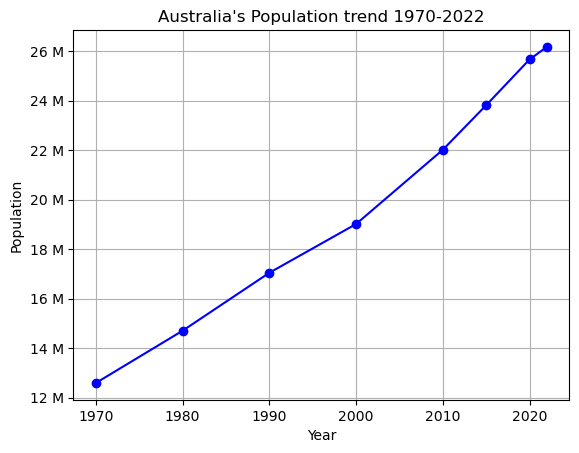

In [26]:
# Plot a chart 
# Add an appropriate title, axes labels to your chart 
# Save the chart to a file 

plt.plot(year, population, '-bo')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title("Australia's Population trend 1970-2022")

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.EngFormatter())
plt.grid(True)

plt.savefig('aus_population.png', bbox_inches = 'tight')


### 2) Attribute Analysis (simple bar chart): How does the Density vary between Continents? 
### Give your chart appropriate title and axis titles, and save it to a file (say, png or jpg)

In [8]:
# What are the different continents found in this dataset?
continents = ori_data['Continent'].unique()
print(continents)

['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']


In [17]:
# Group the data by continents
grouped_data = ori_data.groupby('Continent')

# Print the groups (you can iterate through them or access specific groups) 
for continent in grouped_data:
    print(f"Continent: {continents}")

Continent: ['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']
Continent: ['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']
Continent: ['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']
Continent: ['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']
Continent: ['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']
Continent: ['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']


In [23]:
# What is the average density for each continent? 
# First, group the data by Continent and calculate the average density for each group 
average_density_by_continent = ori_data.groupby('Continent')['Density (per km²)'].mean()

# Print the average density for each continent 
print("Average Density by Continent: ")
print(average_density_by_continent)


Average Density by Continent: 
Continent
Africa            125.047646
Asia             1025.024136
Europe            663.324742
North America     272.761758
Oceania           132.543065
South America      20.971979
Name: Density (per km²), dtype: float64


In [29]:
# Create a list of continents & a list of average density for each continent 
continent_list = list(average_density_by_continent.index) 
print('Continents = ', continent_list) 
density_mean_list = list(average_density_by_continent.values)
print('Average Density (per km^2) = ', density_mean_list) 


Continents =  ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
Average Density (per km^2) =  [125.04764561403509, 1025.024136, 663.324742, 272.76175750000004, 132.5430652173913, 20.971978571428572]


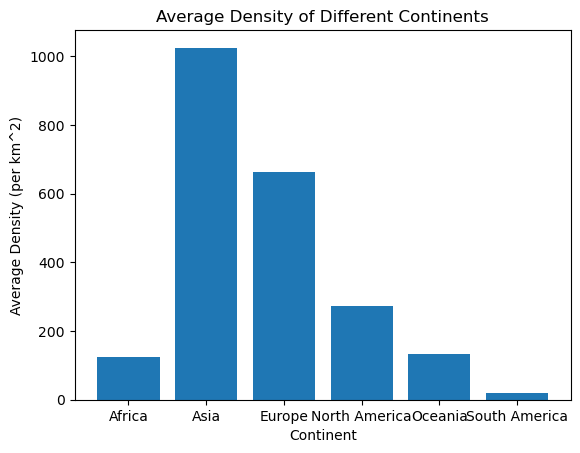

In [30]:
# Plot a chart 
# Add an appropriate title, axes labels to your chart 
# Save the chart to a file 

plt.bar(continent_list, density_mean_list)

plt.xlabel('Continent')
plt.ylabel('Average Density (per km^2)')
plt.title("Average Density of Different Continents")

plt.savefig('continent_density.png', bbox_inches = 'tight')

## Challenge (Optional)

### Ranking analysis: Rank and visualise Top 10 countries based on their growth rate.
